In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [230]:
train = 'cup/ML-CUP24-TR.csv'
test = 'cup/ML-CUP24-TS.csv'

In [231]:
# Read the dataset while skipping metadata lines (lines starting with #)
train_data = pd.read_csv(train, comment='#', header=None)

# Add column headers based on the format
columns = ['ID', 'INPUT1', 'INPUT2', 'INPUT3', 'INPUT4', 'INPUT5', 'INPUT6', 
           'INPUT7', 'INPUT8', 'INPUT9', 'INPUT10', 'INPUT11', 'INPUT12',
           'TARGET_x', 'TARGET_y', 'TARGET_z']

train_data.columns = columns

print("train shape: \n", train_data.shape)
print("train: \n", train_data.head())

train shape: 
 (250, 16)
train: 
    ID    INPUT1    INPUT2    INPUT3    INPUT4    INPUT5    INPUT6    INPUT7  \
0   1  0.946373  0.307995  0.820058 -0.309386  0.950936 -0.000913 -0.093048   
1   2 -0.074075 -0.992654 -1.162582  0.997240 -0.074209 -0.002159 -0.004956   
2   3  0.841384  0.531605  0.810176 -0.534053  0.845451 -0.001057 -0.082832   
3   4  0.737117 -0.668400 -1.065601  0.671734  0.740793  0.000008  0.073704   
4   5 -0.987858 -0.119426 -1.072857  0.120013 -0.992772  0.000064 -0.098661   

     INPUT8    INPUT9    INPUT10   INPUT11   INPUT12  TARGET_x  TARGET_y  \
0 -0.029318  0.995230  -1.175176  2.295016  0.223732 -0.011599 -0.503652   
1 -0.095561  0.995411   0.675930  3.147029 -0.297508 -0.361982 -0.186246   
2 -0.051079  0.995254  -1.069958  2.415989  0.234664  0.170027 -0.344143   
3 -0.066844  0.995038  11.038418  1.003455 -0.100332 -1.032355 -1.184874   
4 -0.011863  0.995050  14.834930  1.127759 -0.112600 -0.134817  2.047468   

    TARGET_z  
0  -5.564158  
1   

In [232]:
test_data = pd.read_csv(test, comment='#', header=None) 

# Add column headers based on the format
columns = ['ID', 'INPUT1', 'INPUT2', 'INPUT3', 'INPUT4', 'INPUT5', 'INPUT6', 
           'INPUT7', 'INPUT8', 'INPUT9', 'INPUT10', 'INPUT11', 'INPUT12']

test_data.columns = columns

print("test shape: \n", test_data.shape)
print("test: \n", test_data.head())

test shape: 
 (500, 13)
test: 
    ID    INPUT1    INPUT2    INPUT3    INPUT4    INPUT5    INPUT6    INPUT7  \
0   1  0.964008  0.249750  0.621279 -0.251304  0.967891  0.005800 -0.086798   
1   2 -0.976968 -0.189726 -1.128659  0.190555 -0.981676  0.000850 -0.096032   
2   3  0.130254  0.986475  0.924671 -0.991395  0.130904  0.000001 -0.013024   
3   4 -0.153785  0.983480  0.744844 -0.988026 -0.154274 -0.002289  0.012480   
4   5 -0.655386 -0.749436 -1.182304  0.752975 -0.658039 -0.003522 -0.059142   

     INPUT8    INPUT9    INPUT10   INPUT11   INPUT12  
0 -0.028503  0.995818  20.769237  4.786694  0.414053  
1 -0.017779  0.995219  19.189428  2.239992 -0.218716  
2 -0.098648  0.995037 -10.339886  1.000085  0.099999  
3 -0.094696  0.995428  -0.650716  3.219906  0.303438  
4 -0.073003  0.995577   0.490563  3.837265 -0.350978  


# Discovering Data

In [78]:
train_data.info()
print('---------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        250 non-null    int64  
 1   INPUT1    250 non-null    float64
 2   INPUT2    250 non-null    float64
 3   INPUT3    250 non-null    float64
 4   INPUT4    250 non-null    float64
 5   INPUT5    250 non-null    float64
 6   INPUT6    250 non-null    float64
 7   INPUT7    250 non-null    float64
 8   INPUT8    250 non-null    float64
 9   INPUT9    250 non-null    float64
 10  INPUT10   250 non-null    float64
 11  INPUT11   250 non-null    float64
 12  INPUT12   250 non-null    float64
 13  TARGET_x  250 non-null    float64
 14  TARGET_y  250 non-null    float64
 15  TARGET_z  250 non-null    float64
dtypes: float64(15), int64(1)
memory usage: 31.4 KB
---------------------------


In [80]:
train_data_wo = train_data.drop(columns=['ID'])
print("train_data_wo: \n", train_data_wo.head())

train_data_wo: 
      INPUT1    INPUT2    INPUT3    INPUT4    INPUT5    INPUT6    INPUT7  \
0  0.946373  0.307995  0.820058 -0.309386  0.950936 -0.000913 -0.093048   
1 -0.074075 -0.992654 -1.162582  0.997240 -0.074209 -0.002159 -0.004956   
2  0.841384  0.531605  0.810176 -0.534053  0.845451 -0.001057 -0.082832   
3  0.737117 -0.668400 -1.065601  0.671734  0.740793  0.000008  0.073704   
4 -0.987858 -0.119426 -1.072857  0.120013 -0.992772  0.000064 -0.098661   

     INPUT8    INPUT9    INPUT10   INPUT11   INPUT12  TARGET_x  TARGET_y  \
0 -0.029318  0.995230  -1.175176  2.295016  0.223732 -0.011599 -0.503652   
1 -0.095561  0.995411   0.675930  3.147029 -0.297508 -0.361982 -0.186246   
2 -0.051079  0.995254  -1.069958  2.415989  0.234664  0.170027 -0.344143   
3 -0.066844  0.995038  11.038418  1.003455 -0.100332 -1.032355 -1.184874   
4 -0.011863  0.995050  14.834930  1.127759 -0.112600 -0.134817  2.047468   

    TARGET_z  
0  -5.564158  
1   3.445744  
2  -3.675575  
3  15.554511  


### Target Distribution

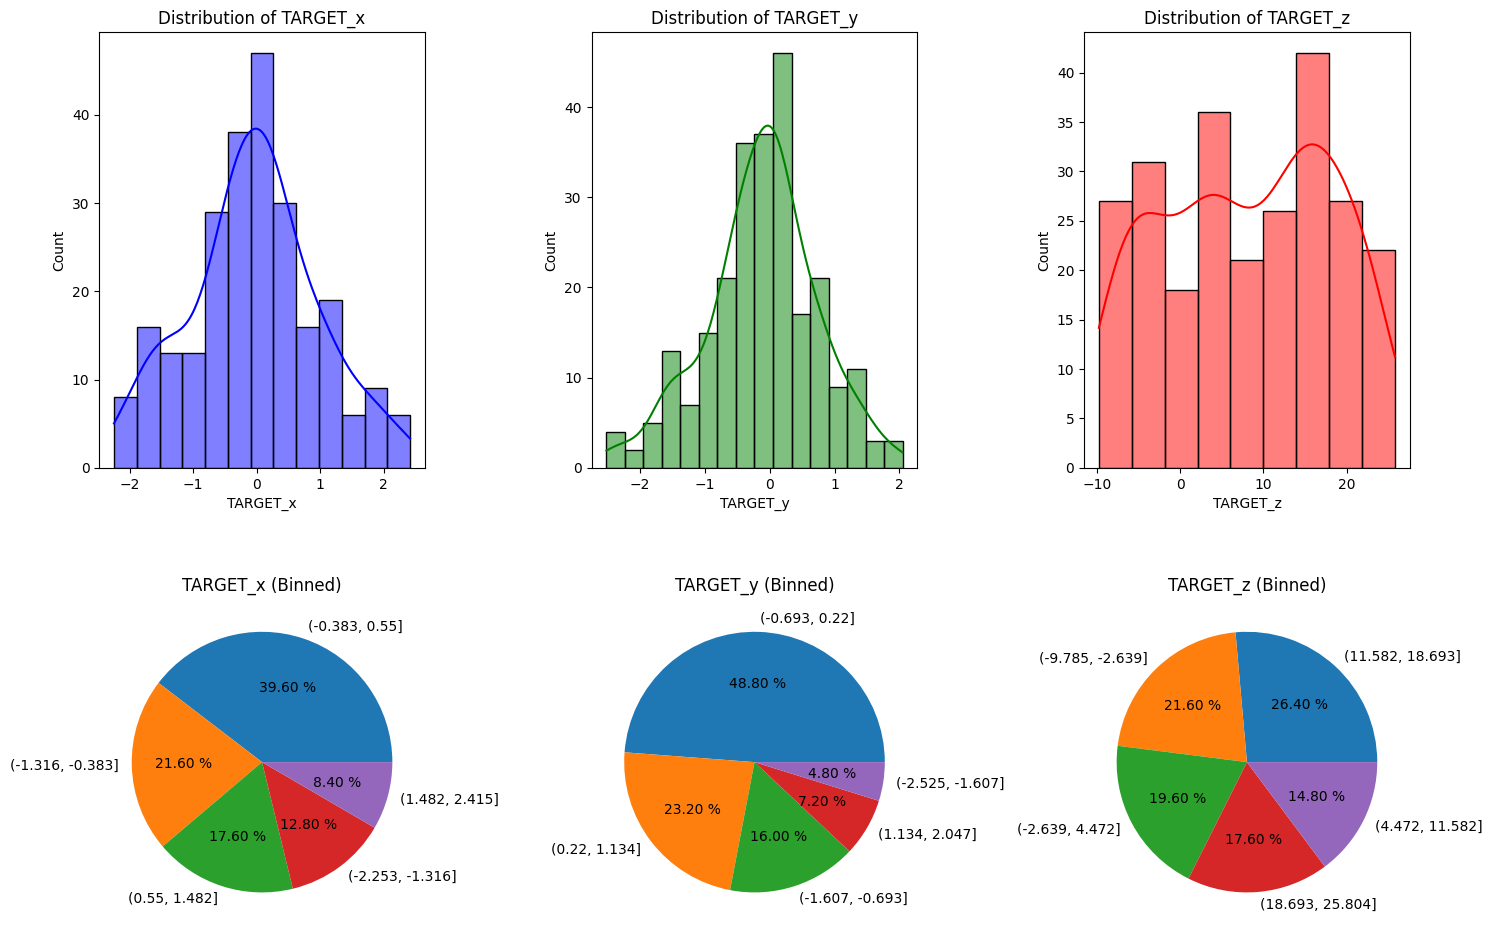

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# (CUP) TARGET_x: Histogram and KDE
sns.histplot(train_data_wo['TARGET_x'], kde=True, ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Distribution of TARGET_x')

# Pie chart for TARGET_x - only if categorical or discrete
# Group values into bins for better visualization in pie chart
bins_x = pd.cut(train_data['TARGET_x'], bins=5)
pie_data_x = bins_x.value_counts()
axs[1, 0].pie(pie_data_x.values, labels=pie_data_x.index, autopct='%.2f %%')
axs[1, 0].set_title('TARGET_x (Binned)')

# (CUP) TARGET_y: Histogram and KDE
sns.histplot(train_data_wo['TARGET_y'], kde=True, ax=axs[0, 1], color='green')
axs[0, 1].set_title('Distribution of TARGET_y')

# Pie chart for TARGET_y
bins_y = pd.cut(train_data_wo['TARGET_y'], bins=5)
pie_data_y = bins_y.value_counts()
axs[1, 1].pie(pie_data_y.values, labels=pie_data_y.index, autopct='%.2f %%')
axs[1, 1].set_title('TARGET_y (Binned)')

# (CUP) TARGET_z: Histogram and KDE
sns.histplot(train_data_wo['TARGET_z'], kde=True, ax=axs[0, 2], color='red')
axs[0, 2].set_title('Distribution of TARGET_z')

# Pie chart for TARGET_z
bins_z = pd.cut(train_data_wo['TARGET_z'], bins=5)
pie_data_z = bins_z.value_counts()
axs[1, 2].pie(pie_data_z.values, labels=pie_data_z.index, autopct='%.2f %%')
axs[1, 2].set_title('TARGET_z (Binned)')

# Adjust layout
plt.tight_layout()
plt.show()

### CUP attributes

<Figure size 2000x1600 with 0 Axes>

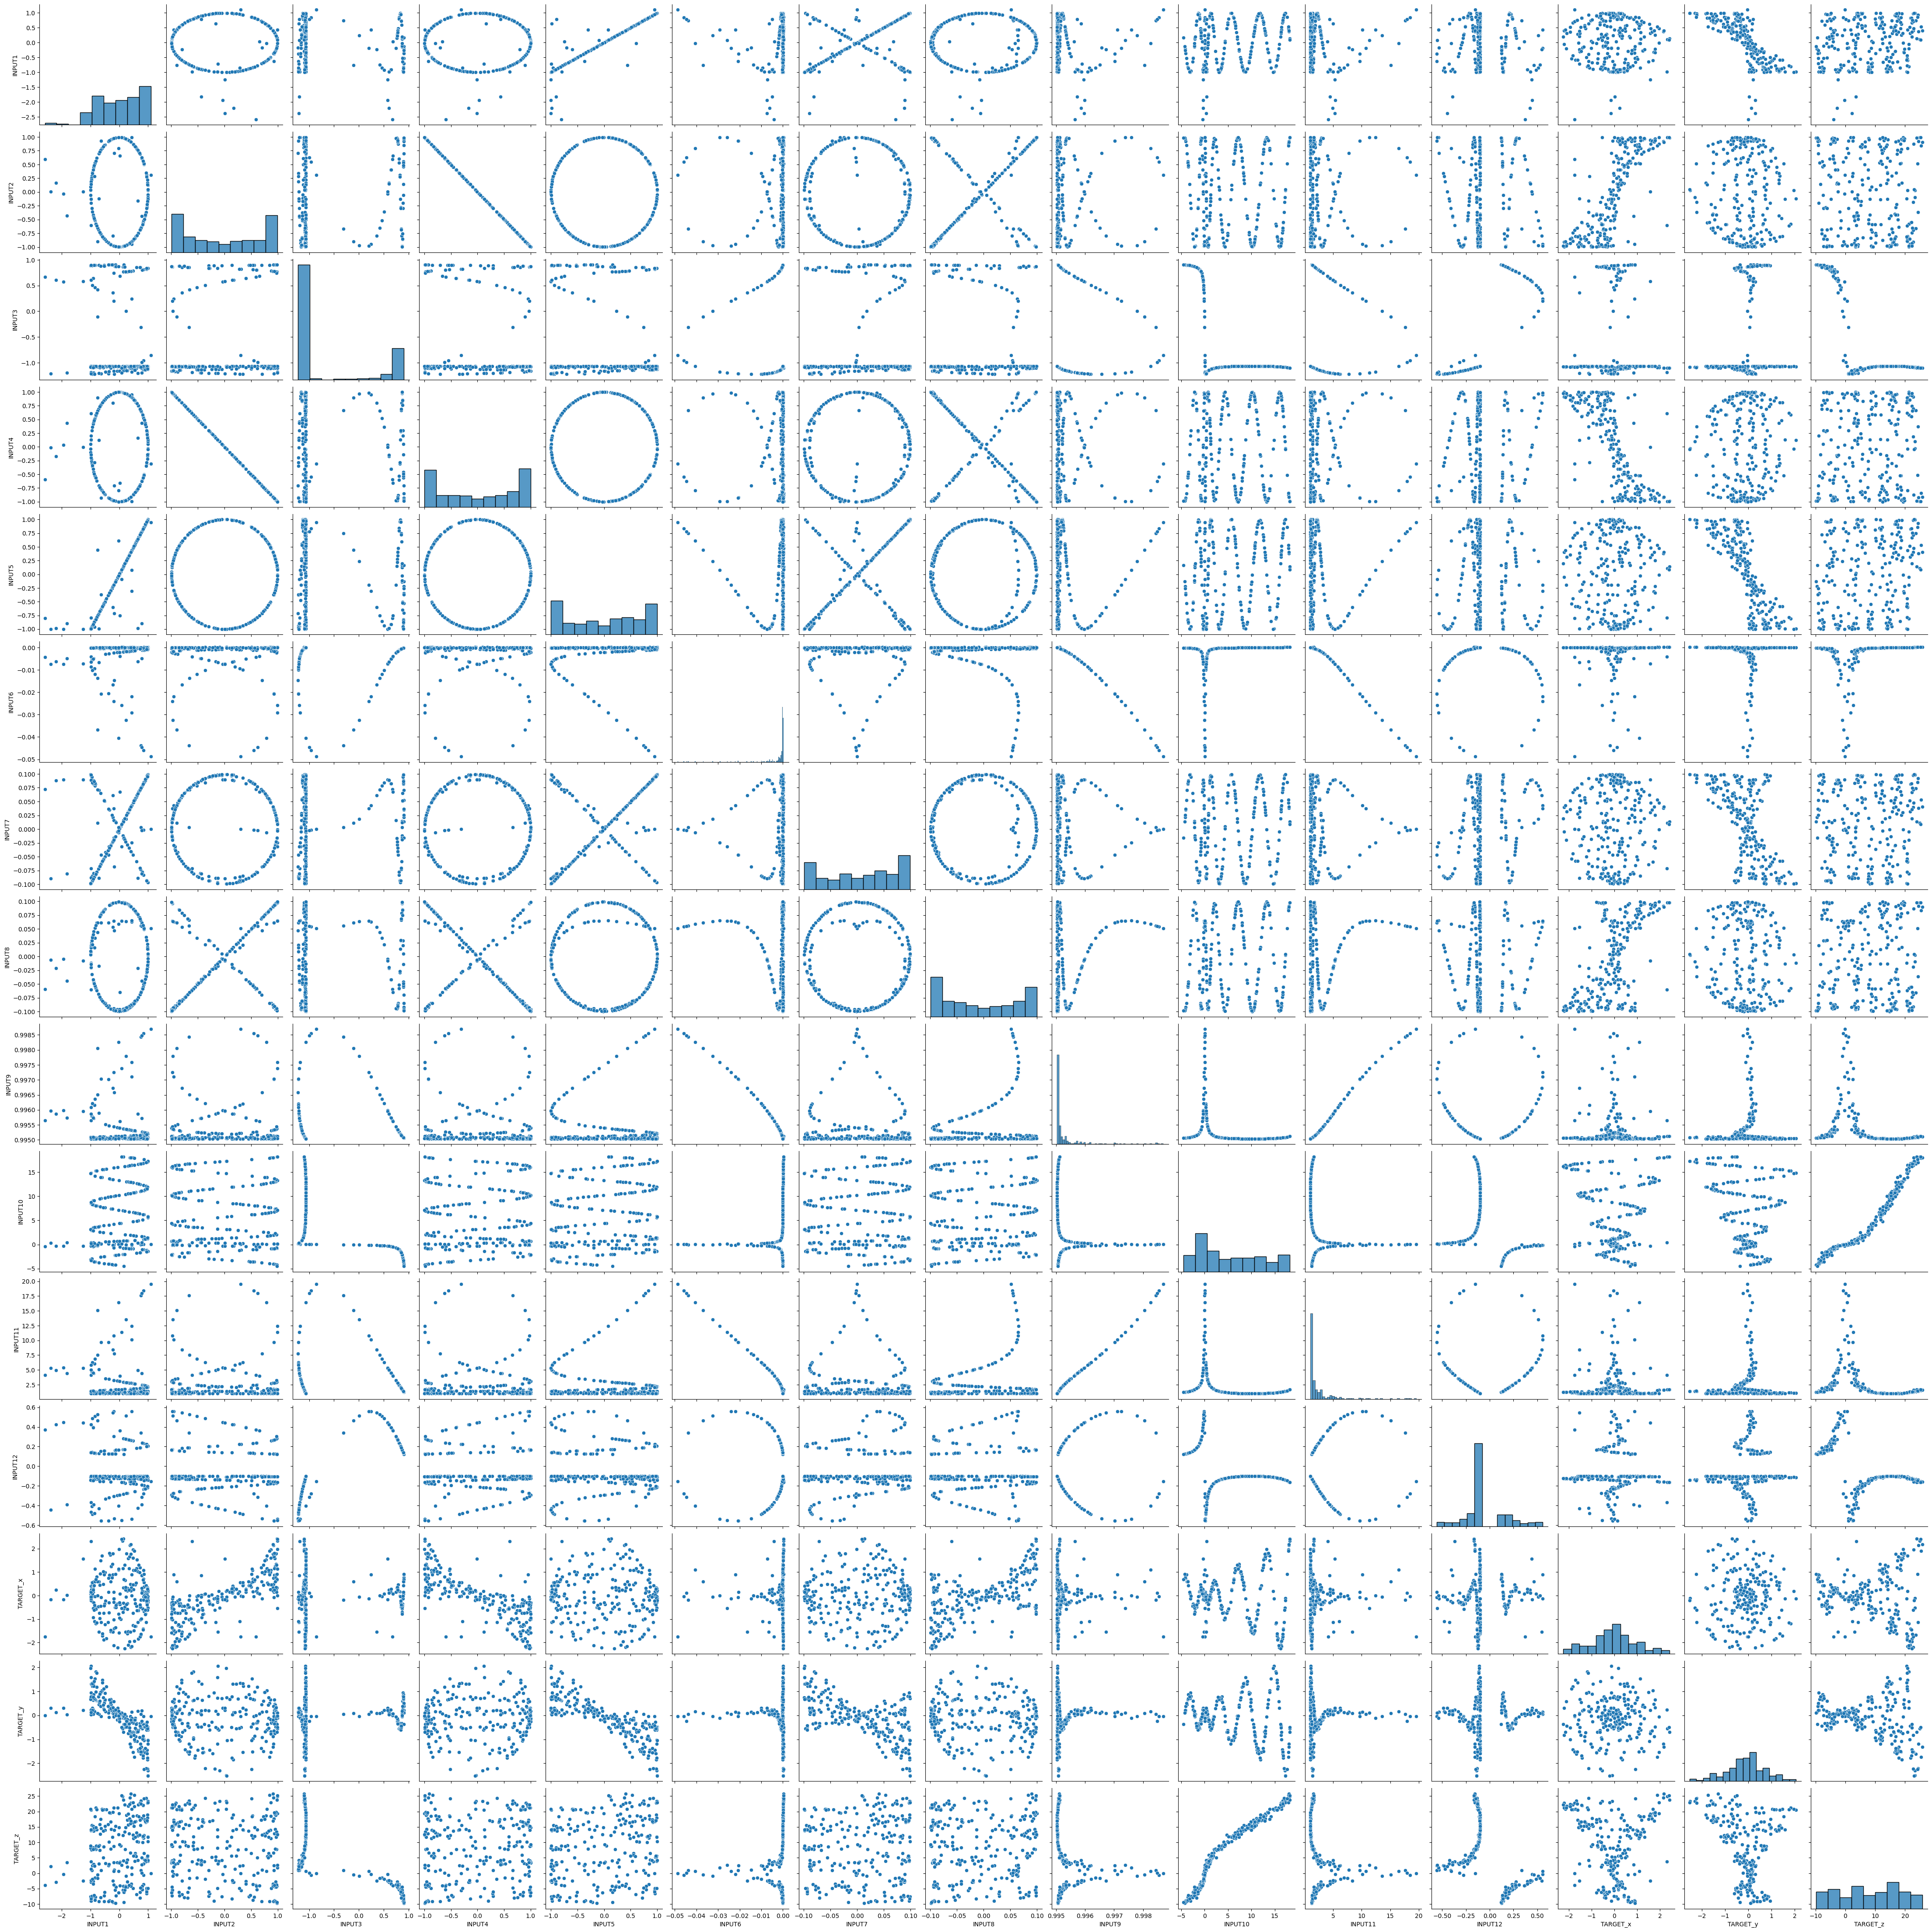

In [82]:
import seaborn as sns
plt.figure(figsize=(20, 16))  # Set the overall figure size (width, height)
sns.pairplot(train_data_wo, height=3)

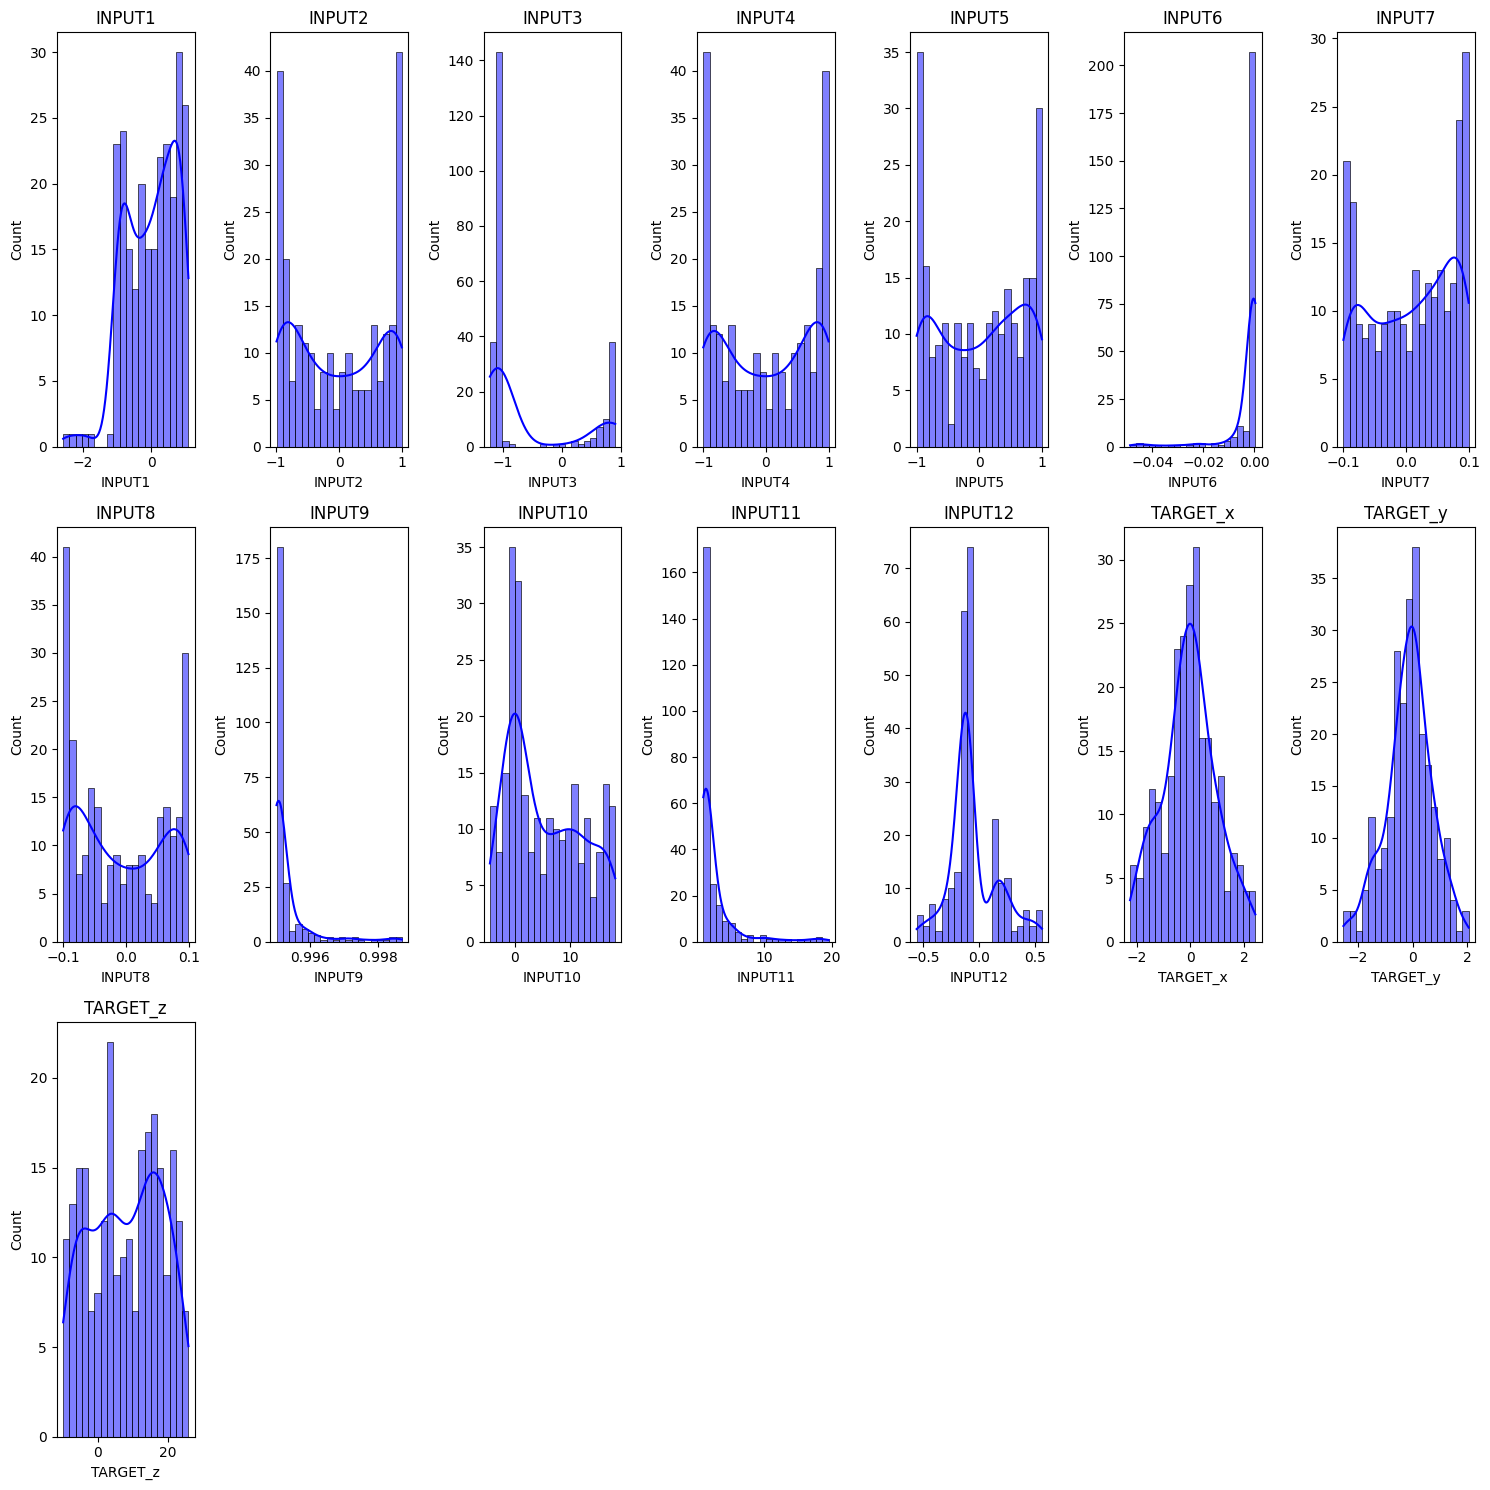

In [83]:
numerical_features = train_data_wo.select_dtypes(exclude=['object'])
# Create subplots: Adjust rows and columns based on the number of numerical features
num_features = len(numerical_features.columns)
rows = (num_features // 7) + 1  # 7 plots per row
cols = min(num_features, 7)
fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # Dynamically adjust the figure size
axs = axs.flatten()  # Flatten to simplify indexing

# Function to show histograms for numerical features
def showHistogram(data):
    for i, feature in enumerate(data.columns):
        sns.histplot(data[feature], kde=True, ax=axs[i], color='blue', bins=20)  # Histogram with KDE
        axs[i].set_title(f'{feature}')
    # Hide unused axes if any
    for j in range(i + 1, len(axs)):
        axs[j].set_visible(False)

# Call the function
showHistogram(numerical_features)

plt.tight_layout()
plt.show()

## Correlation

In [84]:
def calculate_corr(data, targets=['TARGET_x', 'TARGET_y', 'TARGET_z']):
    # Select only numerical features
    numerical_data = data.select_dtypes(exclude=['object'])
    # Calculate correlation matrix
    corr_matrix = numerical_data.corr(method='pearson')
    print("Correlation Matrix:")
    print(corr_matrix)
    
    # Plot heatmap of the correlation matrix
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, linewidths=0.5, square=True, cmap="RdBu", linecolor="black")
    plt.title('Correlation Heatmap')
    plt.show()
    
    # Display and return correlations for each target
    for target in targets:
        if target in corr_matrix.columns:
            print(f"\nCorrelations with {target}:")
            corr_res = corr_matrix[target].sort_values(ascending=False)
            print(corr_res)
        else:
            print(f"\nWarning: {target} not found in correlation matrix.")

Correlation Matrix:
            INPUT1    INPUT2    INPUT3    INPUT4    INPUT5    INPUT6  \
INPUT1    1.000000 -0.011828 -0.148749  0.011879  0.932658  0.015414   
INPUT2   -0.011828  1.000000  0.091252 -1.000000 -0.004727 -0.033425   
INPUT3   -0.148749  0.091252  1.000000 -0.091470 -0.126487 -0.038584   
INPUT4    0.011879 -1.000000 -0.091470  1.000000  0.004757  0.033338   
INPUT5    0.932658 -0.004727 -0.126487  0.004757  1.000000 -0.006944   
INPUT6    0.015414 -0.033425 -0.038584  0.033338 -0.006944  1.000000   
INPUT7    0.424131 -0.018641  0.060488  0.018437  0.490362  0.047398   
INPUT8    0.037536  0.468922 -0.031948 -0.469067  0.037887 -0.193866   
INPUT9   -0.061208  0.029705  0.074321 -0.029630 -0.042832 -0.986465   
INPUT10   0.207886 -0.057262 -0.622929  0.057280  0.213220  0.290037   
INPUT11  -0.041757  0.030534  0.086810 -0.030454 -0.020372 -0.986700   
INPUT12  -0.121765 -0.000041  0.820902 -0.000519 -0.074812 -0.038047   
TARGET_x -0.031989  0.762328  0.068646 -0.76

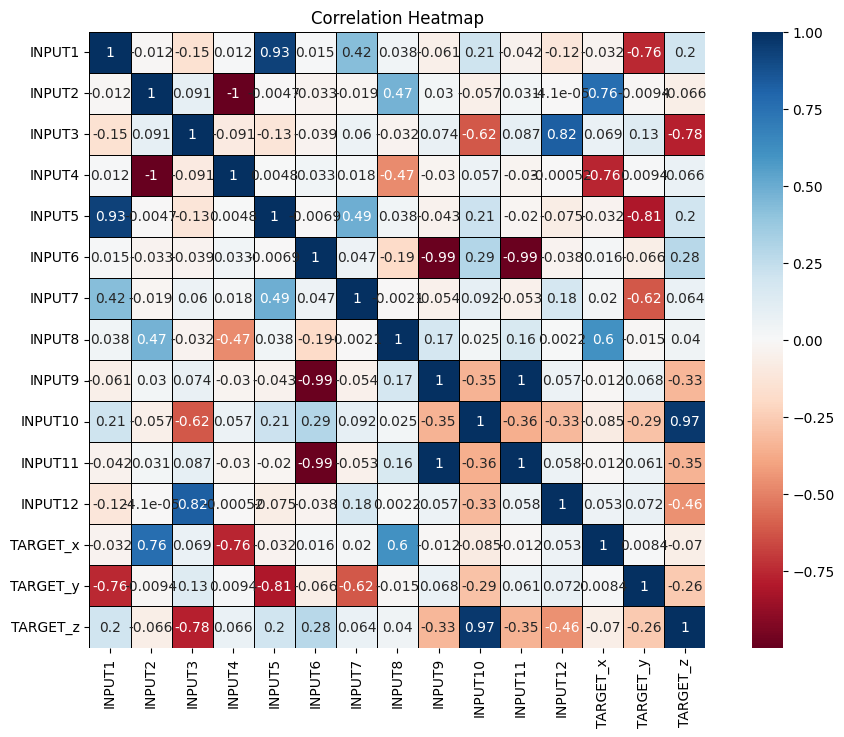


Correlations with TARGET_x:
TARGET_x    1.000000
INPUT2      0.762328
INPUT8      0.604753
INPUT3      0.068646
INPUT12     0.052742
INPUT7      0.020189
INPUT6      0.015845
TARGET_y    0.008352
INPUT9     -0.011676
INPUT11    -0.011717
INPUT1     -0.031989
INPUT5     -0.032366
TARGET_z   -0.069726
INPUT10    -0.084591
INPUT4     -0.762593
Name: TARGET_x, dtype: float64

Correlations with TARGET_y:
TARGET_y    1.000000
INPUT3      0.127498
INPUT12     0.071744
INPUT9      0.068077
INPUT11     0.061461
INPUT4      0.009430
TARGET_x    0.008352
INPUT2     -0.009436
INPUT8     -0.014913
INPUT6     -0.066241
TARGET_z   -0.259155
INPUT10    -0.289129
INPUT7     -0.624759
INPUT1     -0.755810
INPUT5     -0.811631
Name: TARGET_y, dtype: float64

Correlations with TARGET_z:
TARGET_z    1.000000
INPUT10     0.968430
INPUT6      0.276069
INPUT1      0.202586
INPUT5      0.200713
INPUT4      0.066437
INPUT7      0.063696
INPUT8      0.039597
INPUT2     -0.066401
TARGET_x   -0.069726
TARGET_y   

In [85]:
calculate_corr(train_data_wo, targets=['TARGET_x', 'TARGET_y', 'TARGET_z'])

# Preprocessing
splitting the (TRAINING dataset) into training and validation sets while preserving the proportion of the target in the dataset

## Split the data to training and validation

In [233]:
from sklearn.model_selection import train_test_split
import numpy as np

def splitData(data, target_columns, test_size=0.2, random_state=42):
    """
    Split data into training and validation sets for multi-target regression.
    
    Parameters:
    - data: Input DataFrame with features and targets.
    - target_columns: List of target columns (e.g., ['TARGET_x', 'TARGET_y', 'TARGET_z']).
    - test_size: Proportion of the dataset to include in the validation set.
    - random_state: Seed for reproducibility.

    Returns:
    - split_train_set: Training set.
    - split_validation_set: Validation set.
    """
    
    # Extract features (X) and targets (y)
    X = data.drop(columns=target_columns)
    y = data[target_columns]

    # Perform a simple train-test split (without stratification for continuous targets)
    split_train_set, split_validation_set = train_test_split(
        data, test_size=test_size, random_state=random_state, stratify=None
    )

    return split_train_set, split_validation_set

    

## Removing ID

In [234]:
#function to remove the id column from the data
def removeId(data):
    return data.drop('ID', axis=1, errors='ignore')

## Slitting to target and features

In [235]:
# function to split data to features and target
def splitToFeaturesAndTarget(data, target_columns):
    X = data.drop(target_columns, axis=1).values.tolist()
    Y = data[target_columns].values.tolist()
    return X,Y

## Normalization

In [271]:
def normalize(data):
    
    data_normalized = data.copy()
    # Select numeric columns only for normalization
    numeric_data = data_normalized.select_dtypes(include=['float64', 'int64'])

    # Normalize each numeric column separately
    normalized_data = numeric_data.apply(lambda col: (col - col.min()) / (col.max() - col.min()))
    
    # Rejoin with non-numeric columns if needed
    non_numeric_data = data.select_dtypes(exclude=['float64', 'int64'])
    final_data = pd.concat([non_numeric_data, normalized_data], axis=1)
    
    return final_data

In [319]:
def normalize_zscore(data):
    # Create a copy of the data to avoid modifying the original DataFrame
    data_normalized = data.copy()
    
    # Select only numeric columns
    numeric_data = data_normalized.select_dtypes(include=['float64', 'int64'])
    columns_to_normalize = numeric_data.columns

    # Calculate means and standard deviations
    means = numeric_data.mean(axis=0)
    stds = numeric_data.std(axis=0)

    # Avoid division by zero for constant columns
    stds_replaced = stds.replace(0, 1)

    # Apply Z-score normalization
    data_normalized[columns_to_normalize] = (numeric_data - means) / stds_replaced

    return data_normalized

## Applying preprocessing

In [320]:
def preprocessData(data, target_columns=['TARGET_x', 'TARGET_y', 'TARGET_z']):
    #remove the id column
    data = removeId(data)
    data = normalize_zscore(data)

    #split the data to training and validation
    split_train_set, split_validation_set = splitData(data, target_columns, test_size=0.2, random_state=42)
    #split the data to features and target
    train_X, train_Y = splitToFeaturesAndTarget(split_train_set, target_columns)

    #validation set
    validation_X, validation_Y = splitToFeaturesAndTarget(split_validation_set, target_columns)
  
    return np.array(train_X), np.array(train_Y), np.array(validation_X), np.array(validation_Y)

In [321]:
train_X, train_Y, validation_X, validation_Y = preprocessData(train_data, target_columns=['TARGET_x', 'TARGET_y', 'TARGET_z'])
print(f"train_X\n {train_X.shape}")
print(f"train_Y\n {train_Y.shape}")
print(f"validation_X\n {validation_X.shape}")
print(f"validation_Y\n {validation_Y.shape}")

train_X
 (200, 12)
train_Y
 (200, 3)
validation_X
 (50, 12)
validation_Y
 (50, 3)


In [322]:
print(f"train_X\n {train_X}")
print(f"train_Y\n {train_Y}")

train_X
 [[ 0.77882282  1.13961797 -0.61019314 ... -0.54171663 -0.22924549
  -0.5646481 ]
 [-0.28220694 -1.31306183 -0.5701398  ...  1.58382427 -0.4301224
  -0.29281287]
 [ 0.68779288 -1.14099511 -0.5748753  ...  1.67337485 -0.40795146
  -0.32327117]
 ...
 [ 0.13084764  1.3923869  -0.59927298 ...  1.93201845 -0.28731335
  -0.48712446]
 [ 0.17166339  1.38728415 -0.59886665 ...  1.92926646 -0.28942071
  -0.48429302]
 [-0.65660421 -1.17610629 -0.68924758 ... -0.72817657  0.32369879
  -1.23485905]]
train_Y
 [[ 5.80773357e-01 -2.85673053e-01 -2.57730369e-01]
 [-2.06006942e+00  8.41783130e-01  1.30641016e+00]
 [-1.87331449e+00 -1.02923975e+00  1.34492869e+00]
 [-3.32233764e-01 -9.04813205e-04 -4.43031944e-01]
 [ 9.31671441e-01  7.40603694e-01 -1.70103428e+00]
 [ 1.11662603e+00 -1.63556445e+00  1.05344663e+00]
 [ 4.61227088e-01  9.90897941e-01 -1.50556120e+00]
 [-5.18859146e-01  1.01631806e-01 -1.40970170e+00]
 [ 5.92963008e-01  1.70552878e+00  5.98342218e-01]
 [ 1.90576027e-01  1.07936472e+0

In [323]:
print(min(train_Y[:,0]), max(train_Y[:,0]))

-2.183780147688395 2.436879521448262


In [ ]:
print(f"validation_X\n {validation_X}")
print(f"validation_Y\n {validation_Y}")

In [279]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def customRegressionReport(trueValues, predictedValues, target_names):
    # Print individual regression metrics
    mae = mean_absolute_error(trueValues, predictedValues)
    mse = mean_squared_error(trueValues, predictedValues)
    rmse = mse ** 0.5
    r2 = r2_score(trueValues, predictedValues)
    
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    
    # Visualization: scatter plots for predictions vs true values
    if target_names is not None:
        for i, target_name in enumerate(target_names):
            plt.figure(figsize=(6, 6))
            # Min and max for scatter plots
            min_val = min(trueValues[:, i].min(), predictedValues[:, i].min())
            max_val = max(trueValues[:, i].max(), predictedValues[:, i].max())
            # Plot true values
            plt.scatter(trueValues[:, i], trueValues[:, i], alpha=0.5, color="green", label="True Values")
            # Plot predicted values
            plt.scatter(trueValues[:, i], predictedValues[:, i], alpha=0.5, color="blue")
            # Line y = x
            plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--")  
            plt.xlabel("True Values")
            plt.ylabel("Predicted Values")
            plt.title(f"True vs Predicted: {target_name}")
            plt.grid()
            plt.show()
    else:
        # General scatter plot if no target names are provided
        plt.figure(figsize=(6, 6))
        # Min and max for scatter plots
        min_val = min(trueValues.min(), predictedValues.min())
        max_val = max(trueValues.max(), predictedValues.max())
        plt.scatter(trueValues, predictedValues, alpha=0.5, color="blue")
        plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--")  # Line y = x
        plt.xlabel("True Values")
        plt.ylabel("Predicted Values")
        plt.title("True vs Predicted")
        plt.grid()
        plt.show()

Mean Absolute Error (MAE): 0.1688
Mean Squared Error (MSE): 0.1087
Root Mean Squared Error (RMSE): 0.3297
R^2 Score: 0.8664


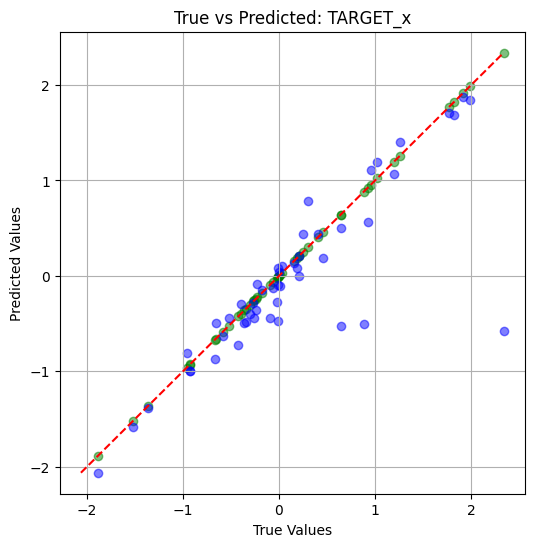

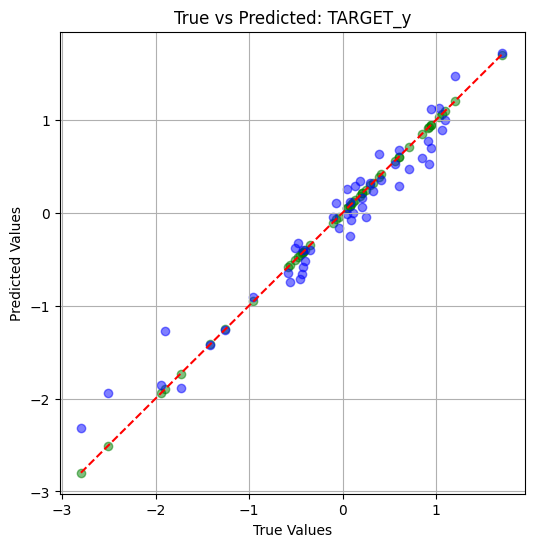

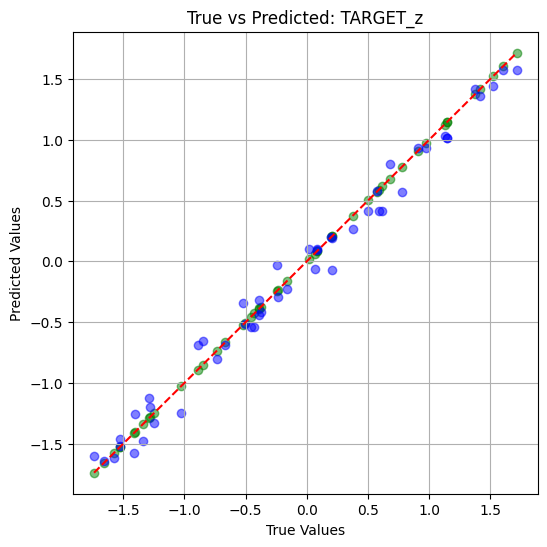

mse di nn regression con sklearn:  0.10871183820488699


In [332]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

def neural_network_regression(x_train, y_train, x_test, y_test, hidden_layers, activation, solver, alpha):

    model = MLPRegressor(hidden_layer_sizes=hidden_layers, activation=activation, solver=solver, alpha=alpha, nesterovs_momentum=True, batch_size=16, learning_rate='constant', learning_rate_init=0.01, momentum=0.85, max_iter=200, random_state=42, early_stopping=True)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)

    customRegressionReport(y_test, y_pred, target_names=['TARGET_x', 'TARGET_y', 'TARGET_z'])

    return y_pred, mse

print("mse di nn regression con sklearn: ", neural_network_regression(train_X, train_Y, validation_X, validation_Y, hidden_layers=[40, 30], activation='relu', solver='sgd', alpha=0.01)[1])
     


## Cross Validation

In [239]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def custom_cross_validation(model, X, y, epoch=None, num_folds=5, metric='mse'):
    """
    Perform k-fold cross-validation for a regression model.

    Parameters:    
    - model: model object.
    - X: input features.
    - y: target values.
    - num_folds: Number of cross-validation folds.
    - epoch: number of epochs for training.
    - metric: evaluation metric ('mse' or 'mae'). Default is 'mse'.
    
    Returns:
    - fold_scores: List of scores (MSE or MAE) for each fold.
    - mean_score: Mean score across all folds.
    """

    X, y = np.array(X), np.array(y)

    # Initialize k-fold (not StratifiedKFold, since it's a regression problem)
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    fold_scores = []
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        print(f"Fold {fold + 1}/{num_folds}")
        
        # Split data
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        print('Train size:', len(X_train))
        print('Test size:', len(X_test))

        # Train the model
        if epoch is not None:
            model.fit(X_train, y_train.reshape(-1, 3), epochs=epoch)
        else:
            model.fit(X_train, y_train.reshape(-1, 3))  
        
        # Evaluate the model on the test set
        predictions = model.predict(X_test)

        # Calculate the chosen regression metric
        if metric == 'mse':
            score = mean_squared_error(y_test, predictions)
        elif metric == 'mae':
            score = mean_absolute_error(y_test, predictions)
        else:
            raise ValueError(f"Unsupported metric: {metric}")
        
        print(f"Fold {fold + 1} {metric.upper()}: {score:.4f}")
        print('--------------------------------------------')
        fold_scores.append(score)

    # Calculate mean score
    mean_score = np.mean(fold_scores)

    # Return fold scores and the mean score
    return mean_score, fold_scores


# Training

In [240]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def customRegressionReport(trueValues, predictedValues, target_names):
    # Print individual regression metrics
    mae = mean_absolute_error(trueValues, predictedValues)
    mse = mean_squared_error(trueValues, predictedValues)
    rmse = mse ** 0.5
    r2 = r2_score(trueValues, predictedValues)
    
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    
    # Visualization: scatter plots for predictions vs true values
    if target_names is not None:
        for i, target_name in enumerate(target_names):
            plt.figure(figsize=(6, 6))
            # Min and max for scatter plots
            min_val = min(trueValues[:, i].min(), predictedValues[:, i].min())
            max_val = max(trueValues[:, i].max(), predictedValues[:, i].max())
            # Plot true values
            plt.scatter(trueValues[:, i], trueValues[:, i], alpha=0.5, color="green", label="True Values")
            # Plot predicted values
            plt.scatter(trueValues[:, i], predictedValues[:, i], alpha=0.5, color="blue")
            # Line y = x
            plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--")  
            plt.xlabel("True Values")
            plt.ylabel("Predicted Values")
            plt.title(f"True vs Predicted: {target_name}")
            plt.grid()
            plt.show()
    else:
        # General scatter plot if no target names are provided
        plt.figure(figsize=(6, 6))
        # Min and max for scatter plots
        min_val = min(trueValues.min(), predictedValues.min())
        max_val = max(trueValues.max(), predictedValues.max())
        plt.scatter(trueValues, predictedValues, alpha=0.5, color="blue")
        plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--")  # Line y = x
        plt.xlabel("True Values")
        plt.ylabel("Predicted Values")
        plt.title("True vs Predicted")
        plt.grid()
        plt.show()


## Grid Search

In [241]:
from enum import Enum

class ActivationType(Enum):
    SIGMOID = "sigmoid"
    RELU = "relu"
    TANH = "tanh"

class RegularizationType(Enum):
    L1 = "l1"
    L2 = "l2"

In [242]:
import random


class Search:
    """Class to perform manual grid search and random search"""

    def __init__(self, model, param_grid, activation_type, regularization_type):
        self.model = model
        self.param_grid = param_grid
        self.activation_type = activation_type
        self.regularization_type = regularization_type


    def grid_search(self, X, y, epoch=200):
        best_score = -float("inf")
        best_params = None

        # Iterate over all possible combinations
        for learning_rate in self.param_grid["learning_rate"]:
            for momentum in self.param_grid["momentum"]:
                for lambd in self.param_grid["lambd"]:
                    for hidden_layers in self.param_grid["hidden_layers"]:
                        # Dynamically create a new model instance with new parameter
                        model = self.model(
                            input_size=X.shape[1],
                            hidden_layers=hidden_layers,
                            output_size=3,
                            activationType=self.activation_type,
                            learning_rate=learning_rate,
                            momentum=momentum,
                            lambd=lambd,
                            regularizationType=self.regularization_type
                        )

                        # Train the model
                        mean_score, scores = custom_cross_validation(model, X, y, epoch=epoch)
                        # model.fit(X, y, epochs=epoch)  

                        # Evaluate the model
                        # score = self.scoring_function(
                        #     model, X, y
                        # )  # Pass the dynamically created model
                        score=mean_score
                        #print(
                        #    f"Learning Rate: {learning_rate}, Momentum: {momentum}, Lambda: {lambd}, Hidden Layers: {hidden_layers}, Score: {score}"
                        #)
                        #print("-----------------------------------------------------")

                        # Update the best score and parameters
                        if score > best_score:
                            best_score = score
                            best_params = {
                                "learning_rate": learning_rate,
                                "momentum": momentum,
                                "lambd": lambd,
                                "hidden_layers": hidden_layers,
                            }

        return best_params, best_score



    import random

    def random_grid_search(self, X, y, n_iter=10, epoch=100, neurons=[3]):
        """Perform random grid search, including patience as a parameter."""

        best_score = -float("inf")
        best_params = None

        # Randomly sample `n_iter` distinct parameters from each grid
        sampled_learning_rates = random.sample(
            self.param_grid["learning_rate"],
            min(n_iter, len(self.param_grid["learning_rate"])),
        )
        sampled_momentum = random.sample(
            self.param_grid["momentum"], min(n_iter, len(self.param_grid["momentum"]))
        )
        sampled_lambd = random.sample(
            self.param_grid["lambd"], min(n_iter, len(self.param_grid["lambd"]))
        )

        for learning_rate in sampled_learning_rates:
            for momentum in sampled_momentum:
                for lambd in sampled_lambd:
                    
                    # Dynamically create a new model instance for each combination of parameters
                    model = self.model(
                        input_size=X.shape[1],
                        hidden_layers=neurons,
                        output_size=3,
                        activationType=self.activation_type,
                        learning_rate=learning_rate,
                        momentum=momentum,
                        lambd=lambd,
                        regularizationType=self.regularization_type
                    )

                    # Train the model with cross validation
                    mean_score, scores = custom_cross_validation(model,X, y,epoch= epoch)
                    # model.fit(X, y, epochs=epoch)

                    # Evaluate the model
                    # score = self.scoring_function(model, X, y)
                    score = mean_score
                    print(
                        f"Learning Rate: {learning_rate}, Momentum: {momentum}, Lambda: {lambd}, Score: {score}"
                    )
                    print("-----------------------------------------------------")

                    # Update the best score and parameters
                    if score > best_score:
                        best_score = score
                        best_params = {
                            "learning_rate": learning_rate,
                            "momentum": momentum,
                            "lambd": lambd,
                            
                        }

        return best_params, best_score

## Custom Neural Network from Scratch

In [259]:

class CustomNeuralNetwork:
    
    def __init__(self, input_size, hidden_layers, output_size, activationType, regularizationType, learning_rate, momentum, lambd):
        """
        Initialize the neural network.
        input_size: Number of input features.
        hidden_layers: List of neurons in each hidden layer.
        output_size: Number of output neurons (1 for binary classification).
        activationType: Type of Activation (relu, sigmoid)
        learning_rate: Learning rate for gradient descent.
        """ 
        
        self.activationType=activationType
        self.regularizationType=regularizationType
        
        self.learning_rate=learning_rate
        self.momentum = momentum
        self.regularization = lambd
        
        # list containing the number of neurons in each layer
        self.layers = [input_size] + hidden_layers + [output_size]

        print(self.layers)

        # Initialize weights 
        # generates a matrix of random values from a normal distribution with mean 0 and variance 1. 
        # The matrix has [self.layers[i] rows] (the number of neurons in layer i) and [self.layers[i+1] columns] (the number of neurons in layer i+1).
        self.weights = [np.random.randn(self.layers[i], self.layers[i+1]) * 0.1 for i in range(len(self.layers) - 1)]
        
        # Initialize bias (bias for each node in each hidden layer and the output layer)
        self.biases = [np.zeros((1, self.layers[i+1])) for i in range(len(self.layers) - 1)]
        
        self.previous_updates_w = [np.zeros_like(w) for w in self.weights]
        self.previous_updates_b = [np.zeros_like(b) for b in self.biases]
        
        
    """Sigmoid activation function."""    
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    """Derivative of sigmoid for backpropagation."""
    @staticmethod
    def sigmoid_derivative(x):
        return x * (1 - x)
    
    """Tanh activation function"""
    @staticmethod
    def tanh(x):
        return np.tanh(x)
    
    """Derivative of tanh activation function"""
    @staticmethod
    def tanh_derivative(x):
        return 1 - np.tanh(x) ** 2
    
    """ReLU activation function."""
    @staticmethod
    def relu(x):
        return np.maximum(0, x)
    
    """Derivative of ReLU for backpropagation."""
    @staticmethod
    def relu_derivative(x):
        return (x > 0).astype(float)
    
    def regularization_l1(self, w):
        return np.sum([np.sum(np.abs(w)) for w in self.weights])
    
    def regularization_l2(self, w):
        return np.sum([np.sum(w ** 2) for w in self.weights])
    
    
    """ function to apply the appropriate activation function based on the passed parameter of the activation type"""
    def apply_activationFunction(self,z):
        if self.activationType==ActivationType.SIGMOID:
            return self.sigmoid(z)
        if self.activationType==ActivationType.RELU:
            return self.relu(z)
        if self.activationType==ActivationType.TANH:
            return self.tanh(z)
        return z    #Linear activation function for the output layer
        
    
    
    """ function to calculate the derivative of the appropriate activation function based on the passed parameter of the activation type"""
    def derivative_activationFunction(self,afterActivation):
        if self.activationType==ActivationType.SIGMOID:
            return self.sigmoid_derivative(afterActivation)
        if self.activationType==ActivationType.RELU:
            return self.relu_derivative(afterActivation)
        if self.activationType==ActivationType.TANH:
            return self.tanh_derivative(afterActivation)
        return 1    #Linear activation function for the output layer
        

    """Perform forward propagation."""
    def forward(self, X):
        # This list will store the pre-activation values (z) for each layer.
        self.beforeActivationOutput = [X]
        
        # This list stores the post-activation values (a) for each layer
        self.afterActivationOutput = [X]
        
        
        for i, (w, b) in enumerate(zip(self.weights, self.biases)):
            #calculate the output of the layer by multiplying the output of the previous layer by the weights, then adding the biases
            z = np.dot(self.afterActivationOutput[-1], w) + b
            if i == len(self.weights) - 1:  # Output layer (no activation or linear)
                a = z
            else:
                # applying the activation function
                a = self.apply_activationFunction(z)
            # append the results 
            self.beforeActivationOutput.append(z)
            self.afterActivationOutput.append(a)
            
        # returning the final output of each instance    
        return self.afterActivationOutput[-1]
    

    """Perform backward propagation."""
    def backward(self, X, y):
        output_error = self.afterActivationOutput[-1] - y
        errors = [output_error]
    
        # Backpropagate errors through each layer
        for i in range(len(self.weights) - 1, 0, -1):
            error = np.dot(errors[0], self.weights[i].T) * self.derivative_activationFunction(self.afterActivationOutput[i])
            errors.insert(0, error)
    
        # Update weights and biases using gradient descent
        for i in range(len(self.weights)):
            # Compute gradients
            weight_gradient = np.dot(self.afterActivationOutput[i].T, errors[i])
            bias_gradient = np.sum(errors[i], axis=0, keepdims=True)
    
            # Normalize gradients
            weight_gradient /= X.shape[0]
            bias_gradient /= X.shape[0]
    
            # Apply regularization (weight decay)
            weight_gradient += self.regularization * self.weights[i]
    
            # Apply momentum and calculate updates
            weight_update = self.learning_rate * weight_gradient + self.momentum * self.previous_updates_w[i]
            bias_update = self.learning_rate * bias_gradient + self.momentum * self.previous_updates_b[i]
    
            # Update weights and biases
            self.weights[i] -= weight_update  # Nota: il segno è invertito qui
            self.biases[i] -= bias_update
    
            # Store the updates for the next iteration
            self.previous_updates_w[i] = weight_update
            self.previous_updates_b[i] = bias_update


    """Train the neural network."""
    def fit(self, X, y, epochs=500):
        # to store the loss for each epoch
        history = {'train_loss': [], 'epoch': []}
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y)
            
            # Calculate loss (Mean Squared Error + Regularization)
            if self.regularizationType==RegularizationType.L1:
                loss = np.mean((self.afterActivationOutput[-1] - y) ** 2) + self.regularization * self.regularization_l1(self.weights)
            else:
                loss = np.mean((self.afterActivationOutput[-1] - y) ** 2) + self.regularization * self.regularization_l2(self.weights)
            
            if epoch % 50 == 0:
                history['train_loss'].append(loss)
                history['epoch'].append(epoch)
                #print(f"Epoch {epoch}, Loss: {loss}")
        return history
    
    def predict(self, X):
        """Make predictions using the trained model."""
        return self.forward(X)


In [260]:
#reshape train_X, train_Y, validation_X  
X = train_X
y = train_Y.reshape(-1, 3)   

print(f"train X shape: {X.shape}")
print(f"train Y shape: {y.shape}")

train X shape: (200, 12)
train Y shape: (200, 3)


In [ ]:
# Define the parameter grid 
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate values
    'momentum': [0.6, 0.7, 0.8, 0.9],              # Momentum values
    'lambd': [0.0, 0.001, 0.01, 0.1],              # Regularization lambda values
    'hidden_layers': [[10, 13], [5, 10, 15], [10, 5, 4], [12, 15, 3]]    # Number of neurons in the hidden layer
}

# Initialize the Search class for grid search
search = Search(CustomNeuralNetwork, param_grid, activation_type=ActivationType.SIGMOID, regularization_type=RegularizationType.L2)

# Perform grid search on the learning rate
print("Performing Grid Search...")
best_params, best_score = search.grid_search(X, y, epoch=500)
print(f"Best Parameters:\n {best_params}, Best Score: {best_score}")

[12, 10, 5, 4, 3]
hidden layers:  [10, 5, 4] learning rate:  0.2 momentum:  0.7 lambda:  0.1


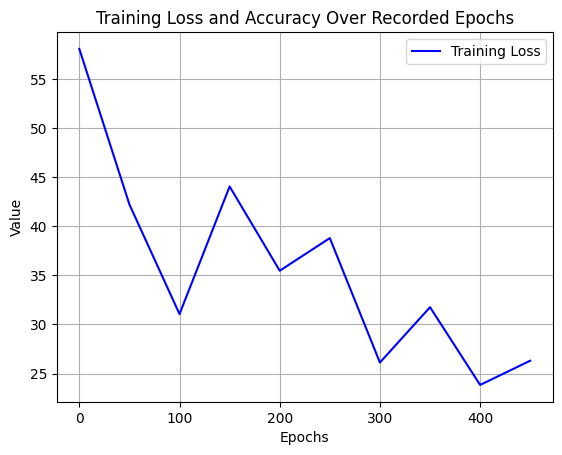

Predicting validation set
Mean Absolute Error (MAE): 1.8862
Mean Squared Error (MSE): 9.3647
Root Mean Squared Error (RMSE): 3.0602
R^2 Score: 0.2454


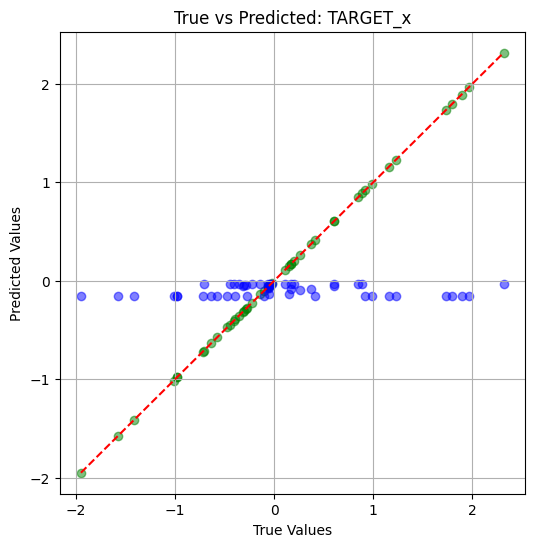

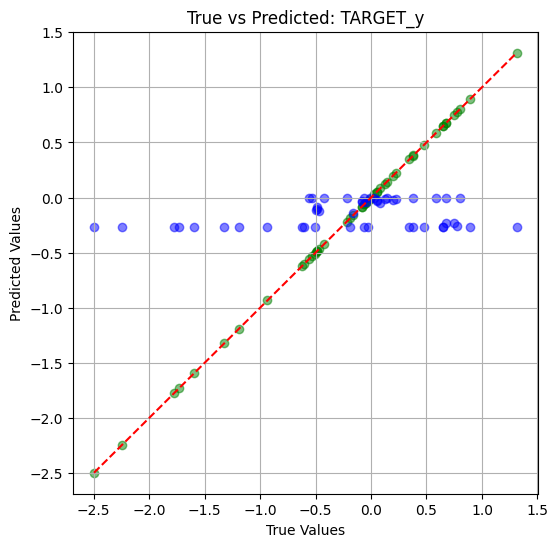

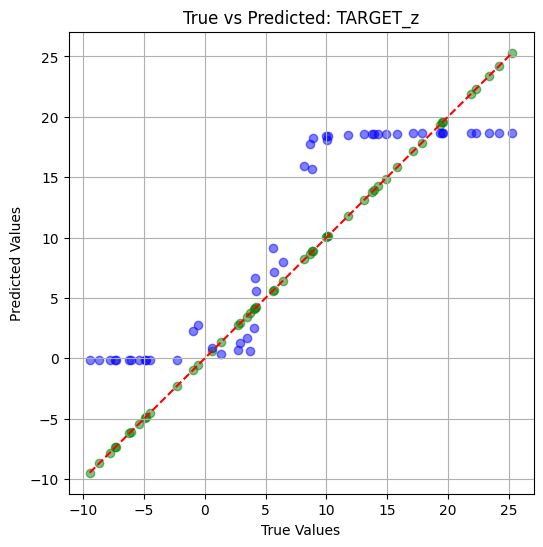

In [265]:
# Define the network with dynamic hidden layers
nn1 = CustomNeuralNetwork(input_size=X.shape[1], 
                         hidden_layers=best_params['hidden_layers'],
                         output_size=3,
                         activationType=ActivationType.SIGMOID,
                         learning_rate=best_params['learning_rate'],
                         momentum=best_params['momentum'],
                         lambd=best_params['lambd'],
                         regularizationType=RegularizationType.L2
                         )

print("hidden layers: ", best_params['hidden_layers'], "learning rate: ", best_params['learning_rate'], "momentum: ", best_params['momentum'], "lambda: ", best_params['lambd'])

# Train the network 
history = nn1.fit(X, y, epochs=500)

# Plot a single graph with Loss and Training Accuracy
plt.figure()

# Plot Training Loss
plt.plot(history['epoch'], history['train_loss'], label='Training Loss', color='blue', linestyle='-')

# Plot Training Accuracy
#plt.plot(history['epoch'], history['train_acc'], label='Training Accuracy', color='orange', linestyle='--')

# Configure the plot
plt.xlabel('Epochs')  # X-axis as the recorded epochs
plt.ylabel('Value')  # Shared y-axis label
plt.title('Training Loss and Accuracy Over Recorded Epochs')
plt.legend()  
plt.grid(True)

# Display the plot
plt.show()

# Validation predictions
print('Predicting validation set')
validation_nn_predictions = nn1.predict(validation_X)
customRegressionReport(validation_Y, validation_nn_predictions, target_names=['TARGET_x', 'TARGET_y', 'TARGET_z'])